In [13]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

# Arquivo csv com os dados, sem a extensão.
filename = 'sub5'

In [14]:
df = pd.read_csv(f"../eval/{filename}.csv")
df.head()

n_threads      wtime
0          1  52.422302
1          2  25.992435
2          4  13.172278
3          8   6.404255
4         12   4.348056

In [15]:
t0 = df[df["n_threads"] == 1].groupby(by=["n_threads"]).mean()["wtime"]
t0

n_threads
1    52.441614
Name: wtime, dtype: float64

In [17]:
df['mean_wtime_sequential'] = df['n_threads'].transform(lambda n_threads: t0[1])
df.head()

n_threads      wtime  mean_wtime_sequential
0          1  52.422302              52.441614
1          2  25.992435              52.441614
2          4  13.172278              52.441614
3          8   6.404255              52.441614
4         12   4.348056              52.441614

In [18]:
df["speedup"] = df['mean_wtime_sequential'] / df["wtime"]
df["efficiency"] = df["speedup"] / df["n_threads"]
df.head()

n_threads      wtime  mean_wtime_sequential    speedup  efficiency
0          1  52.422302              52.441614   1.000368    1.000368
1          2  25.992435              52.441614   2.017572    1.008786
2          4  13.172278              52.441614   3.981211    0.995303
3          8   6.404255              52.441614   8.188558    1.023570
4         12   4.348056              52.441614  12.060934    1.005078

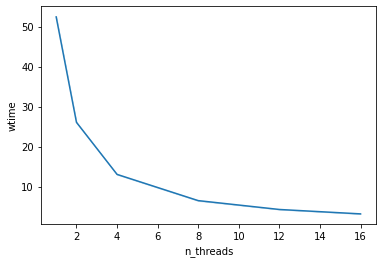

In [20]:
ax = sns.lineplot(x="n_threads", y="wtime", data=df)
plt.savefig(f'../eval/{filename}_wtime.png', dpi=400)

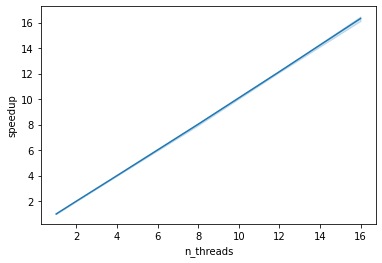

In [21]:
ax = sns.lineplot(x="n_threads", y="speedup", data=df)
plt.savefig(f'../eval/{filename}_speedup.png', dpi=400)

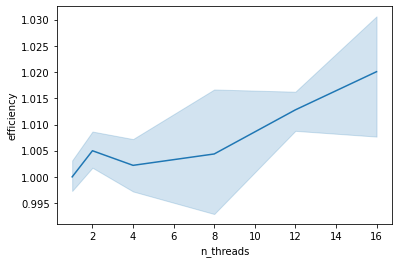

In [22]:
ax = sns.lineplot(x="n_threads", y="efficiency", data=df)
plt.savefig(f'../eval/{filename}_efficiency.png', dpi=400)